In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[ : , : -1 ].values
y = dataset.iloc[ : , -1 ].values

In [3]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range = ( 0 , 1 ) )
X = scaler.fit_transform( X )
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
!pip install MiniSom

In [5]:
from minisom import MiniSom

In [6]:
#first two inputs are the dimension of the som, x * y, which is a 10 * 10 in this case
#third input is the number of features in the input data
#4th input is sigma the radius of different neighbourhood
#5th input is the learning rate ( default is 0.5 )
som = MiniSom( x = 10 , y = 10 , input_len = 15 , sigma = 1.0 , learning_rate = 0.5 )

In [7]:
som.random_weights_init( X )
som.train_random( data = X , num_iteration = 100 )

In [8]:
#visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

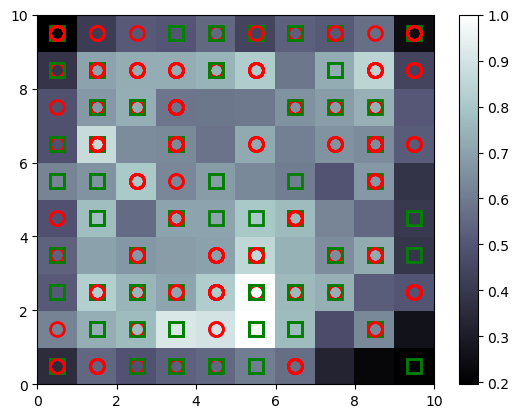

In [9]:
bone()
#distance_map() will return all the mean inter-neuron distance in one matrix
pcolor( som.distance_map().T )
colorbar()
markers = [ 'o' , 's' ]
colors = [ 'r' , 'g' ]

for i , x in enumerate( X ):
    w = som.winner( x )
    plot( w[0] + 0.5 , w[1] + 0.5 , markers[ y[ i ] ] , markeredgecolor = colors[ y[ i ] ] , markerfacecolor = 'None' , markersize = 10 , markeredgewidth = 2)
show()

In [10]:
mappings = som.win_map( X )
mappings

defaultdict(list,
            {(9,
              9): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0. 

In [13]:
frauds = np.concatenate( ( mappings[(5,1)] , mappings[(5,2)] ) , axis = 0 )
frauds

array([[7.31933416e-01, 1.00000000e+00, 4.59849624e-01, 1.78571429e-02,
        5.00000000e-01, 1.53846154e-01, 8.75000000e-01, 1.75438596e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 1.60000000e-01, 0.00000000e+00],
       [8.19656508e-01, 1.00000000e+00, 2.84511278e-01, 3.21428571e-01,
        0.00000000e+00, 6.15384615e-01, 8.75000000e-01, 1.84210526e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 7.70000000e-02, 0.00000000e+00],
       [8.65982725e-01, 1.00000000e+00, 6.35338346e-01, 4.46428571e-01,
        5.00000000e-01, 2.30769231e-01, 8.75000000e-01, 2.80701754e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 1.20000000e-02, 2.02800000e-02],
       [8.41055704e-01, 1.00000000e+00, 2.18045113e-01, 1.80000000e-01,
        0.00000000e+00, 5.38461538e-01, 5.00000000e-01, 5.26315789e-02,
        1.00000000e+00, 1.00000000e+0

In [15]:
frauds = scaler.inverse_transform( frauds )
frauds

array([[1.5748499e+07, 1.0000000e+00, 4.4330000e+01, 5.0000000e-01,
        2.0000000e+00, 3.0000000e+00, 8.0000000e+00, 5.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 1.0000000e+00],
       [1.5770406e+07, 1.0000000e+00, 3.2670000e+01, 9.0000000e+00,
        1.0000000e+00, 9.0000000e+00, 8.0000000e+00, 5.2500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.5400000e+02, 1.0000000e+00],
       [1.5781975e+07, 1.0000000e+00, 5.6000000e+01, 1.2500000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.4000000e+01, 2.0290000e+03],
       [1.5775750e+07, 1.0000000e+00, 2.8250000e+01, 5.0400000e+00,
        1.0000000e+00, 8.0000000e+00, 5.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [17]:
#here we have given a list of potential list of frauds
#Then their analysist can check if the customer is been approved,and investigate more to check if the customer has cheated